In [1]:
# importing necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

RANDOM_STATE = 55

In [2]:
# Dataset

df = pd.read_csv(f"D:\kiggle file\Bodavan\heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# All column name
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [4]:
# data type of all column
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [9]:
# all categorical column
df.select_dtypes("object").columns.tolist()


['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [13]:
# all column name by uniqe datatypes group
col_by_types = df.dtypes.groupby(df.dtypes).groups
for data_type, cols in col_by_types.items():
    print(f"{data_type}: {list(cols)}")

int64: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'HeartDisease']
float64: ['Oldpeak']
object: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [15]:
# gitting the unique value for categorical variables

cat_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]
# Assuming you have a DataFrame named 'df' and a list of column names 'column_names'
unique_values_by_column = {col: df[col].unique() for col in cat_variables }

# Print unique values for each column
for column_name, unique_values in unique_values_by_column.items():
    print(f"Unique values for {column_name}: {unique_values}")

Unique values for Sex: ['M' 'F']
Unique values for ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
Unique values for RestingECG: ['Normal' 'ST' 'LVH']
Unique values for ExerciseAngina: ['N' 'Y']
Unique values for ST_Slope: ['Up' 'Flat' 'Down']


In [16]:
# making categorical variable into numarical variable using one hot encoding

cat_variables = ['Sex',
'ChestPainType',
'RestingECG',
'ExerciseAngina',
'ST_Slope'
]

df = pd.get_dummies(data=df,
                   prefix = cat_variables,
                   columns = cat_variables)

In [38]:
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [44]:
# split the data into feature and target
X = [x for x in df.columns if x not in 'HeartDisease'] ## Removing our target variable
y=df["HeartDisease"]

print(len(X))

20


In [46]:
# split the dataset into train and split
X_train,X_test,y_train,y_test = train_test_split(df[X],y,train_size= 0.8,random_state=53)

In [47]:
print(f"train sample: {len(X_train)}")
print(f"test sample: {len(X_test)}")

train sample: 734
test sample: 184


# Decision Tree

min_samples_split: The minimum number of samples required to split an internal node.
Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.
max_depth: The maximum depth of the tree.
Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.

In [48]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700] ## If the number is an integer, then it is the actual quantity of samples,
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None] 

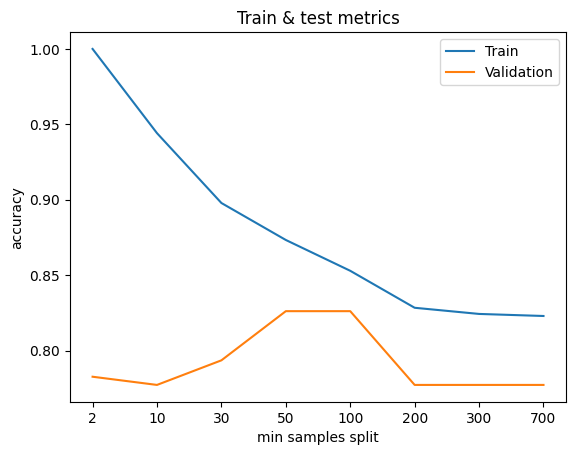

In [52]:
# for samples split 


accuracy_list_train = []
accuracy_list_test = []

for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples_split, 
                                  random_state=53).fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    accuracy_train = accuracy_score(pred_train,y_train)
    accuracy_test =accuracy_score(pred_test,y_test)
    
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)
    
    
plt.title("Train & test metrics")
plt.xlabel("min samples split")
plt.ylabel("accuracy")
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

# 
- Increasing min_samples_split from 10 to 30, and from 30 to 50, even though it does not improve the validation accuracy, it brings the training accuracy closer to it, showing a reduction in overfitting.

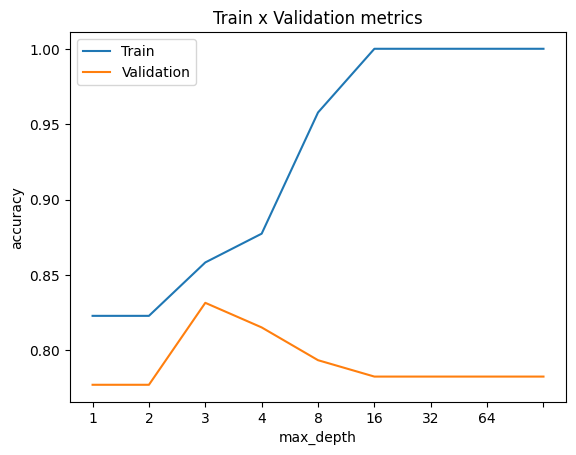

In [57]:
# for depth list
accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = DecisionTreeClassifier(max_depth = max_depth,
                                   random_state = 53).fit(X_train,y_train) 
    predictions_train = model.predict(X_train) ## The predicted values for the train dataset
    predictions_test = model.predict(X_test) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train)
    accuracy_test = accuracy_score(predictions_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

# 
- Reducing max_depth from 8 to 4 increases validation accuracy closer to training accuracy, while significantly reducing training accuracy.
- The validation accuracy reaches the highest at tree_depth=4.
- When the max_depth is smaller than 3, both training and validation accuracy decreases. The tree cannot make enough splits to distinguish positives from negatives (the model is underfitting the training set).

So we can choose the best values for these two hyper-parameters for our model to be:

- max_depth = 4
- min_samples_split = 50

This is how we choose max depth and min samples split (in avobe two code)

In [58]:
# decision tree model

dt_model = DecisionTreeClassifier(min_samples_split = 50,
                                 max_depth = 4,
                                 random_state = 53).fit(X_train,y_train)

In [59]:
# accuracy score of decision tree model

print(f"Metrics train: \n\t Accuracy score: {accuracy_score(dt_model.predict(X_train),y_train): 4f} ")
print(f"Metrics test: \n\t Accuracy score: {accuracy_score(dt_model.predict(X_test),y_test): 4f} ")

Metrics train: 
	 Accuracy score:  0.867847 
Metrics test: 
	 Accuracy score:  0.831522 


# Random Forest
Now let's try the Random Forest algorithm also, using the Scikit-learn implementation.

- All of the hyperparameters found in the decision tree model will also exist in this algorithm, since a random forest is an ensemble of many Decision Trees.
- One additional hyperparameter for Random Forest is called n_estimators which is the number of Decision Trees that make up the Random Forest.
- We will run the same script again, but with another parameter, n_estimators, where we will choose between 10, 50, and 100. The default is 100

In [60]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

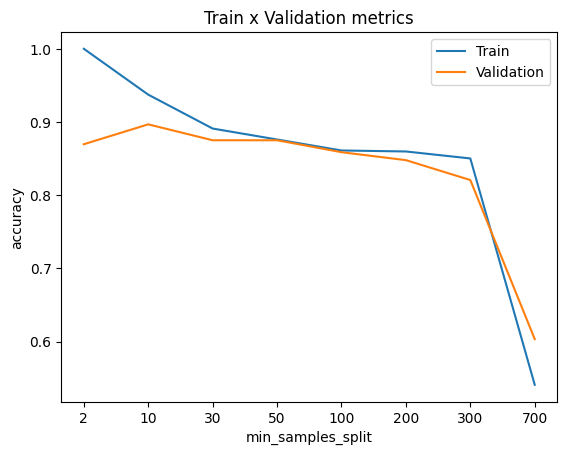

In [66]:
# choosing min samples lplit list

accuracy_list_train = []
accuracy_list_test = []
for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                               random_state = 53).fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    accuracy_train = accuracy_score(pred_train,y_train)
    accuracy_test = accuracy_score(pred_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)
    
plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

# 
Notice that, even though the validation accuraty reaches is the same both at min_samples_split = 2 and min_samples_split = 10, in the latter the difference in training and validation set reduces, showing less overfitting

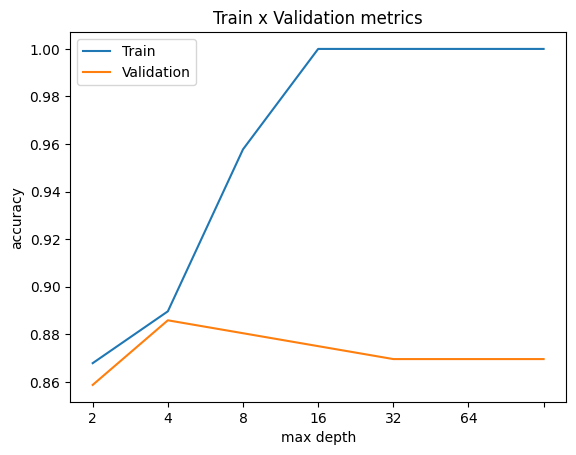

In [67]:
# choosing max depth

accuracy_list_train = []
accuracy_list_test = []
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth = max_depth,
                               random_state = 53).fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    accuracy_train = accuracy_score(pred_train,y_train)
    accuracy_test = accuracy_score(pred_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)
    
plt.title('Train x Validation metrics')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

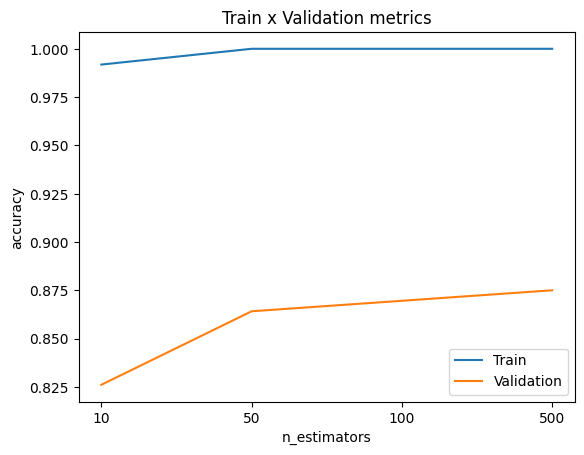

In [68]:
# choosing n_estimators_list

accuracy_list_train = []
accuracy_list_test = []
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators = n_estimators,
                               random_state = 53).fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    accuracy_train = accuracy_score(pred_train,y_train)
    accuracy_test = accuracy_score(pred_test,y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)
    
plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list) 
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Validation'])

Let's then fit a random forest with the following parameters:

- max_depth: 16
- min_samples_split: 10
- n_estimators: 100

In [84]:
# random forest model
random_forest_model = RandomForestClassifier(n_estimators= 100,
                                            max_depth = 15,
                                            min_samples_split = 10).fit(X_train,y_train)

In [85]:
# accuracy score of decision tree model

print(f"Metrics train: \n\t Accuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train): 4f} ")
print(f"Metrics test: \n\t Accuracy score: {accuracy_score(random_forest_model.predict(X_test),y_test): 4f} ")

Metrics train: 
	 Accuracy score:  0.935967 
Metrics test: 
	 Accuracy score:  0.885870 


Note that we are searching for the best value one hyperparameter while leaving the other hyperparameters at their default values.

- Ideally, we would want to check every combination of values for every hyperparameter that we are tuning.
- If we have 3 hyperparameters, and each hyperparameter has 4 values to try out, we should have a total of 4 x 4 x 4 = 64 combinations to try.
- When we only modify one hyperparameter while leaving the rest as their default value, we are trying 4 + 4 + 4 = 12 results.
- To try out all combinations, we can use a sklearn implementation called GridSearchCV. GridSearchCV has a refit parameter that will automatically refit a model on the best combination so we will not need to program it explicitly. For more on GridSearchCV, please refer to its documentation.

# XGBoost
Next is the Gradient Boosting model, called XGBoost. The boosting methods train several trees, but instead of them being uncorrelated to each other, now the trees are fit one after the other in order to minimize the error.

The model has the same parameters as a decision tree, plus the learning rate.

- The learning rate is the size of the step on the Gradient Descent method that the XGBoost uses internally to minimize the error on each train step.
One interesting thing about the XGBoost is that during fitting, it can take in an evaluation dataset of the form (X_val,y_val).

- On each iteration, it measures the cost (or evaluation metric) on the evaluation datasets.
- Once the cost (or metric) stops decreasing for a number of rounds (called early_stopping_rounds), the training will stop.
- More iterations lead to more estimators, and more estimators can result in overfitting.
- By stopping once the validation metric no longer improves, we can limit the number of estimators created, and reduce overfitting.

In [87]:
# Let's use 80% to train and 20% to eval
n = int(len(X_train)*0.8)
n

587

In [88]:
X_train_fit,X_train_eval,y_train_fit,y_train_eval = X_train[:n],X_train[n:],y_train[:n],y_train[n:]

We can then set a large number of estimators, because we can stop if the cost function stops decreasing.

Note some of the .fit() parameters:

- eval_set = [(X_train_eval,y_train_eval)]:Here we must pass a list to the eval_set, because you can have several different tuples ov eval sets.
- early_stopping_rounds: This parameter helps to stop the model training if its evaluation metric is no longer improving on the validation set. It's set to 10.
  - The model keeps track of the round with the best performance (lowest evaluation metric). For example, let's say round 16 has the lowest evaluation metric so far.
  - Each successive round's evaluation metric is compared to the best metric. If the model goes 10 rounds where none have a better metric than the best one, then the model stops training.
  - The model is returned at its last state when training terminated, not its state during the best round. For example, if the model stops at round 26, but the best round was 16, the model's training state at round 26 is returned, not round 16.
  - Note that this is different from returning the model's "best" state (from when the evaluation metric was the lowest).

In [89]:
xgb_model = XGBClassifier(n_estimations = 500, learning_rate = 0.1,verbosity =1, random_state = 53)
xgb_model.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)], early_stopping_rounds= 10)

[06:44:06] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "n_estimations" } are not used.

[0]	validation_0-logloss:0.64897
[1]	validation_0-logloss:0.61398
[2]	validation_0-logloss:0.58472
[3]	validation_0-logloss:0.55909
[4]	validation_0-logloss:0.53762
[5]	validation_0-logloss:0.52031
[6]	validation_0-logloss:0.50823
[7]	validation_0-logloss:0.49778
[8]	validation_0-logloss:0.48828
[9]	validation_0-logloss:0.48003
[10]	validation_0-logloss:0.47188
[11]	validation_0-logloss:0.46471
[12]	validation_0-logloss:0.45897
[13]	validation_0-logloss:0.45166
[14]	validation_0-logloss:0.44640
[15]	validation_0-logloss:0.43959
[16]	validation_0-logloss:0.43722
[17]	validation_0-logloss:0.43488
[18]	validation_0-logloss:0.43317
[19]	validation_0-logloss:0.43148
[20]	validation_0-logloss:0.42752
[21]	validation_0-logloss:0.42262
[22]	validation_0-logloss:0.42025
[23]	validation_0-logloss:0.41914
[24]	validation_0-logloss:0.41775
[25]	validati

C:\Users\user\.conda\envs\tf\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-logloss:0.42177
[39]	validation_0-logloss:0.42238


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimations=500, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

# code interprate

The parameters provided are:
- n_estimations: The number of boosting estimators (decision trees) to be created during training. In this case, 500 decision trees will be trained.
- learning_rate: The step size shrinkage used to prevent overfitting. It controls the contribution of each tree in the ensemble. A smaller value requires more trees to be added to the model. Here, a learning rate of 0.1 is used.
- verbosity: The level of verbosity for the output during training. A value of 1 provides some information about the training progress.
- random_state: The random seed used for reproducibility. Setting this value to 53 ensures that the results will be the same each time the code is run.

from 2nd line
- The eval_set argument is optional but useful for monitoring the performance of the model during training
- The early_stopping_rounds parameter is optional as well. It allows early stopping based on the evaluation metric provided. If the performance on the evaluation set does not improve for early_stopping_rounds consecutive rounds, the training is stopped early. Here, if there is no improvement in the evaluation metric for 10 consecutive rounds, the training will stop.

In [90]:
xgb_model.best_iteration

29

In [94]:
# accuracy for XGBoost
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test),y_test):.4f}")

Metrics train:
	Accuracy score: 0.9346
Metrics test:
	Accuracy score: 0.8587


# accuracy scores of the random forest, decision tree, and XGBoost models:

In [100]:
# Calculate accuracy scores for each model
rf_train_accuracy = accuracy_score(random_forest_model.predict(X_train), y_train)
rf_test_accuracy = accuracy_score(random_forest_model.predict(X_test), y_test)

dt_train_accuracy = accuracy_score(dt_model.predict(X_train), y_train)
dt_test_accuracy = accuracy_score(dt_model.predict(X_test), y_test)

xgb_train_accuracy = accuracy_score(xgb_model.predict(X_train), y_train)
xgb_test_accuracy = accuracy_score(xgb_model.predict(X_test), y_test)

# Create a table header
table_header = ["Model", "Train Accuracy", "Test Accuracy"]
# Create a list of rows for the table
table_rows = [
    ["Random Forest", rf_train_accuracy, rf_test_accuracy],
    ["Decision Tree", dt_train_accuracy, dt_test_accuracy],
    ["XGBoost", xgb_train_accuracy, xgb_test_accuracy]
]
# Print the table header
print("{:<15} {:<15} {:<15}".format(*table_header))

# Print the table rows
for row in table_rows:
    print("{:<15} {:<15.4f} {:<15.4f}".format(*row))

Model           Train Accuracy  Test Accuracy  
Random Forest   0.9360          0.8859         
Decision Tree   0.8678          0.8315         
XGBoost         0.9346          0.8587         
